In [1]:
import numpy as np

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('ratings.csv')

In [73]:
df1 = df.sample(frac=0.01)

In [74]:
df1.head()

,userId,movieId,rating,timestamp
16742456,108599,2424,4.0,1153744944
17044037,110525,798,2.0,1023470838
18112119,117305,110,4.0,833198831
18060996,117032,2001,3.0,979942869
12301726,79677,2312,4.0,966881872


In [75]:
movies_titles = pd.read_csv('movies.csv')

In [76]:
movies_titles.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [77]:
df1 = pd.merge(df1,movies_titles,on='movieId')

In [78]:
df1.head()

,userId,movieId,rating,timestamp,title,genres
0,108599,2424,4.0,1153744944,You've Got Mail (1998),Comedy|Romance
1,35657,2424,4.0,1167434143,You've Got Mail (1998),Comedy|Romance
2,54330,2424,4.0,956590012,You've Got Mail (1998),Comedy|Romance
3,139194,2424,5.0,1551582873,You've Got Mail (1998),Comedy|Romance
4,55908,2424,5.0,1202130944,You've Got Mail (1998),Comedy|Romance


In [79]:
df1[df1['movieId']==50]

,userId,movieId,rating,timestamp,title,genres
43428,58587,50,5.0,828012818,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
43429,57418,50,4.0,1076983608,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
43430,102798,50,5.0,976219396,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
43431,98280,50,4.5,1219313964,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
43432,37643,50,4.0,944966400,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
43971,158767,50,4.0,845266676,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
43972,84372,50,5.0,1139184469,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
43973,21112,50,5.0,1439761449,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
43974,72539,50,4.0,843388931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [80]:
sns.set_style('white')

In [81]:
df1.groupby('title')['rating'].mean()

title
"Great Performances" Cats (1998)          3.000
#Horror (2015)                            1.500
$ (Dollars) (1971)                        3.000
'71 (2014)                                2.375
'Master Harold'... and the Boys (1985)    3.000
                                          ...  
Švestka (1997)                            4.000
В движении (2002)                         3.500
Демидовы (1983)                           3.000
Мартынко (1987)                           3.500
Цветик-семицветик (1948)                  2.500
Name: rating, Length: 14240, dtype: float64

In [82]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250001 entries, 0 to 250000
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     250001 non-null  int64  
 1   movieId    250001 non-null  int64  
 2   rating     250001 non-null  float64
 3   timestamp  250001 non-null  int64  
 4   title      250001 non-null  object 
 5   genres     250001 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 13.4+ MB


In [83]:
df1.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Lovers of the Café Flore (2006)    5.0
Body and Soul (1947)               5.0
Unseen (2016)                      5.0
Boricua's Bond (2000)              5.0
Salomé (1923)                      5.0
Name: rating, dtype: float64

In [84]:
df1.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Forrest Gump (1994)                          880
Shawshank Redemption, The (1994)             817
Silence of the Lambs, The (1991)             777
Star Wars: Episode IV - A New Hope (1977)    761
Pulp Fiction (1994)                          743
Name: rating, dtype: int64

In [85]:
ratings = pd.DataFrame(df1.groupby('title')['rating'].mean())

In [86]:
ratings.head()

,rating
title,
"""Great Performances"" Cats (1998)",3.000
#Horror (2015),1.500
$ (Dollars) (1971),3.000
'71 (2014),2.375
'Master Harold'... and the Boys (1985),3.000


In [87]:
ratings['num of ratings'] = pd.DataFrame(df1.groupby('title')['rating'].count())

In [88]:
ratings.head()

,rating,num of ratings
title,,
"""Great Performances"" Cats (1998)",3.000,1
#Horror (2015),1.500,1
$ (Dollars) (1971),3.000,1
'71 (2014),2.375,4
'Master Harold'... and the Boys (1985),3.000,1


<AxesSubplot:>

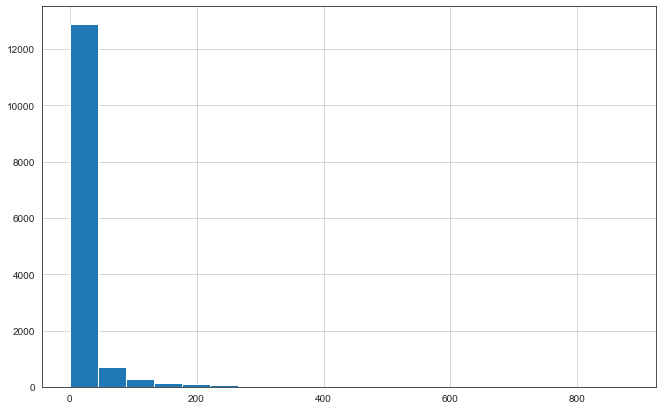

In [89]:
plt.figure(figsize=(11,7))
ratings['num of ratings'].hist(bins=20)

<AxesSubplot:xlabel='num of ratings', ylabel='Count'>

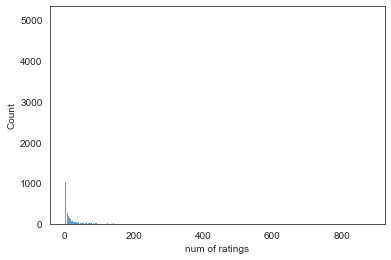

In [90]:
sns.histplot(data=ratings,x='num of ratings')

<AxesSubplot:>

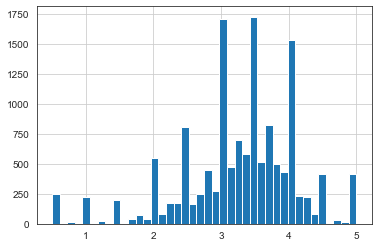

In [91]:
ratings['rating'].hist(bins=40)

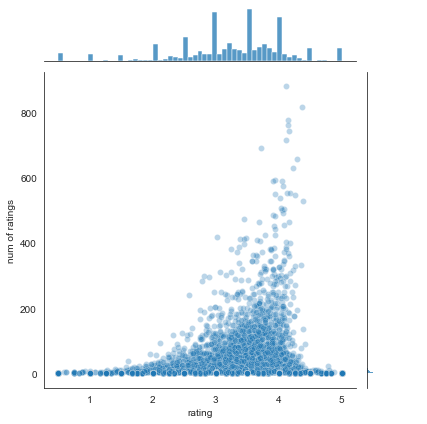

In [92]:
sns.jointplot(data=ratings,x='rating',y='num of ratings',alpha=0.3)

In [93]:
df1.head()

,userId,movieId,rating,timestamp,title,genres
0,108599,2424,4.0,1153744944,You've Got Mail (1998),Comedy|Romance
1,35657,2424,4.0,1167434143,You've Got Mail (1998),Comedy|Romance
2,54330,2424,4.0,956590012,You've Got Mail (1998),Comedy|Romance
3,139194,2424,5.0,1551582873,You've Got Mail (1998),Comedy|Romance
4,55908,2424,5.0,1202130944,You've Got Mail (1998),Comedy|Romance


In [ ]:
moviemat = df1.pivot_table(index='userId',columns='title',values='rating')